## Saving Results

In general, there can be saved two types of data:

1. DataFrames with information about data and fit
2. All other data, such as fit results, covariance matrices, etc. plus `raw` and `fit` as `.lock` output file.

In [1]:
# Loading packages and default data
from spectrafit.plugins import notebook as nb
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/Anselmoo/spectrafit/main/Examples/data.csv"
)

### Load the data into the notebook-plugin of `SpectraFit`

In this particular name the default output name is `example9_3.lock` and the default output directory is `./result.*`. The default output directory can be changed via the keyword `fname`.

In [2]:
spn = nb.SpectraFitNotebook(df=df, x_column="Energy", y_column="Noisy", fname="example9_3")

### Define the fitting model without plotting the results

In [9]:
initial_model = [
    {
        "pseudovoigt": {
            "amplitude": {"max": 2, "min": 0, "vary": True, "value": 1},
            "center": {"max": 2, "min": -2, "vary": True, "value": 0},
            "fwhmg": {"max": 0.3, "min": 0.02, "vary": True, "value": 0.1},
            "fwhml": {"max": 0.2, "min": 0.01, "vary": True, "value": 0.1},
        }
    },
    {
        "gaussian": {
            "amplitude": {"max": 2, "min": 0, "vary": True, "value": 0.3},
            "center": {"max": 2., "min": 0, "vary": True, "value": 2},
            "fwhmg": {"max": 0.3, "min": 0.02, "vary": True, "value": 0.1},
        }
    },
     {
        "gaussian": {
            "amplitude": {"max": 2, "min": 0, "vary": True, "value": 0.3},
            "center": {"max": 3.5, "min": 1.5, "vary": True, "value": 2.5},
            "fwhmg": {"max": 0.4, "min": 0.02, "vary": True, "value": 0.2},
        }
    },
    {
        "gaussian": {
            "amplitude": {"max": 2, "min": 0, "vary": True, "value": 0.3},
            "center": {"max": 3.5, "min": 2, "vary": True, "value": 2.5},
            "fwhmg": {"max": 0.4, "min": 0.02, "vary": True, "value": 0.3},
        }
    },
    {
        "gaussian": {
            "amplitude": {"max": 2, "min": 0, "vary": True, "value": 0.3},
            "center": {"max": 4.5, "min": 3, "vary": True, "value": 2.5},
            "fwhmg": {"max": 0.4, "min": 0.02, "vary": True, "value": 0.3},
        }
    },
    {
        "gaussian": {
            "amplitude": {"max": 2, "min": 0, "vary": True, "value": 0.3},
            "center": {"max": 4.7, "min": 3.7, "vary": True, "value": 3.2},
            "fwhmg": {"max": 0.4, "min": 0.02, "vary": True, "value": 0.2},
        }
    },
]
spn.solver_model(initial_model=initial_model, show_plot=False)

##  Warning: uncertainties could not be estimated:


### Saving the results as dataframes

Results of the dataframe can be saved as a `.csv` file. The _original_, the _final fitted_, _current_ used optional _pre processed_ data can be saved as a `.csv` file as well.


Currently, the following dataframes can be saved:

- `df_org`: The original data
- `df_act`: The actually used data, which can be different from the original data, if the optional pre processing is used.
- `df_fit`: The fitted data
- `df_peaks`: The fit results of each peak component

In [4]:
spn.export_df_org
spn.export_df_act
spn.export_df_fit
spn.export_df_peaks

In [5]:
from pathlib import Path

list(Path(".").glob("*.csv"))

[PosixPath('org_example9_3.csv'),
 PosixPath('act_example9_3.csv'),
 PosixPath('fit_example9_3.csv'),
 PosixPath('peaks_example9_3.csv')]

Finally, the results can be stored in a `.lock` file. This file contains all the information about the fit, the data, the model, the parameters, the covariance matrix, etc. The `.lock` file can be loaded back into the `SpectraFit` notebook-plugin via [`tomli`](https://pypi.org/project/tomli/)

### Showning peak components as a table

For each peak component, the following information can be shown:

In [6]:
spn.solver_model(initial_model=initial_model, show_plot=False, show_peaks=True)


##  Warning: uncertainties could not be estimated:


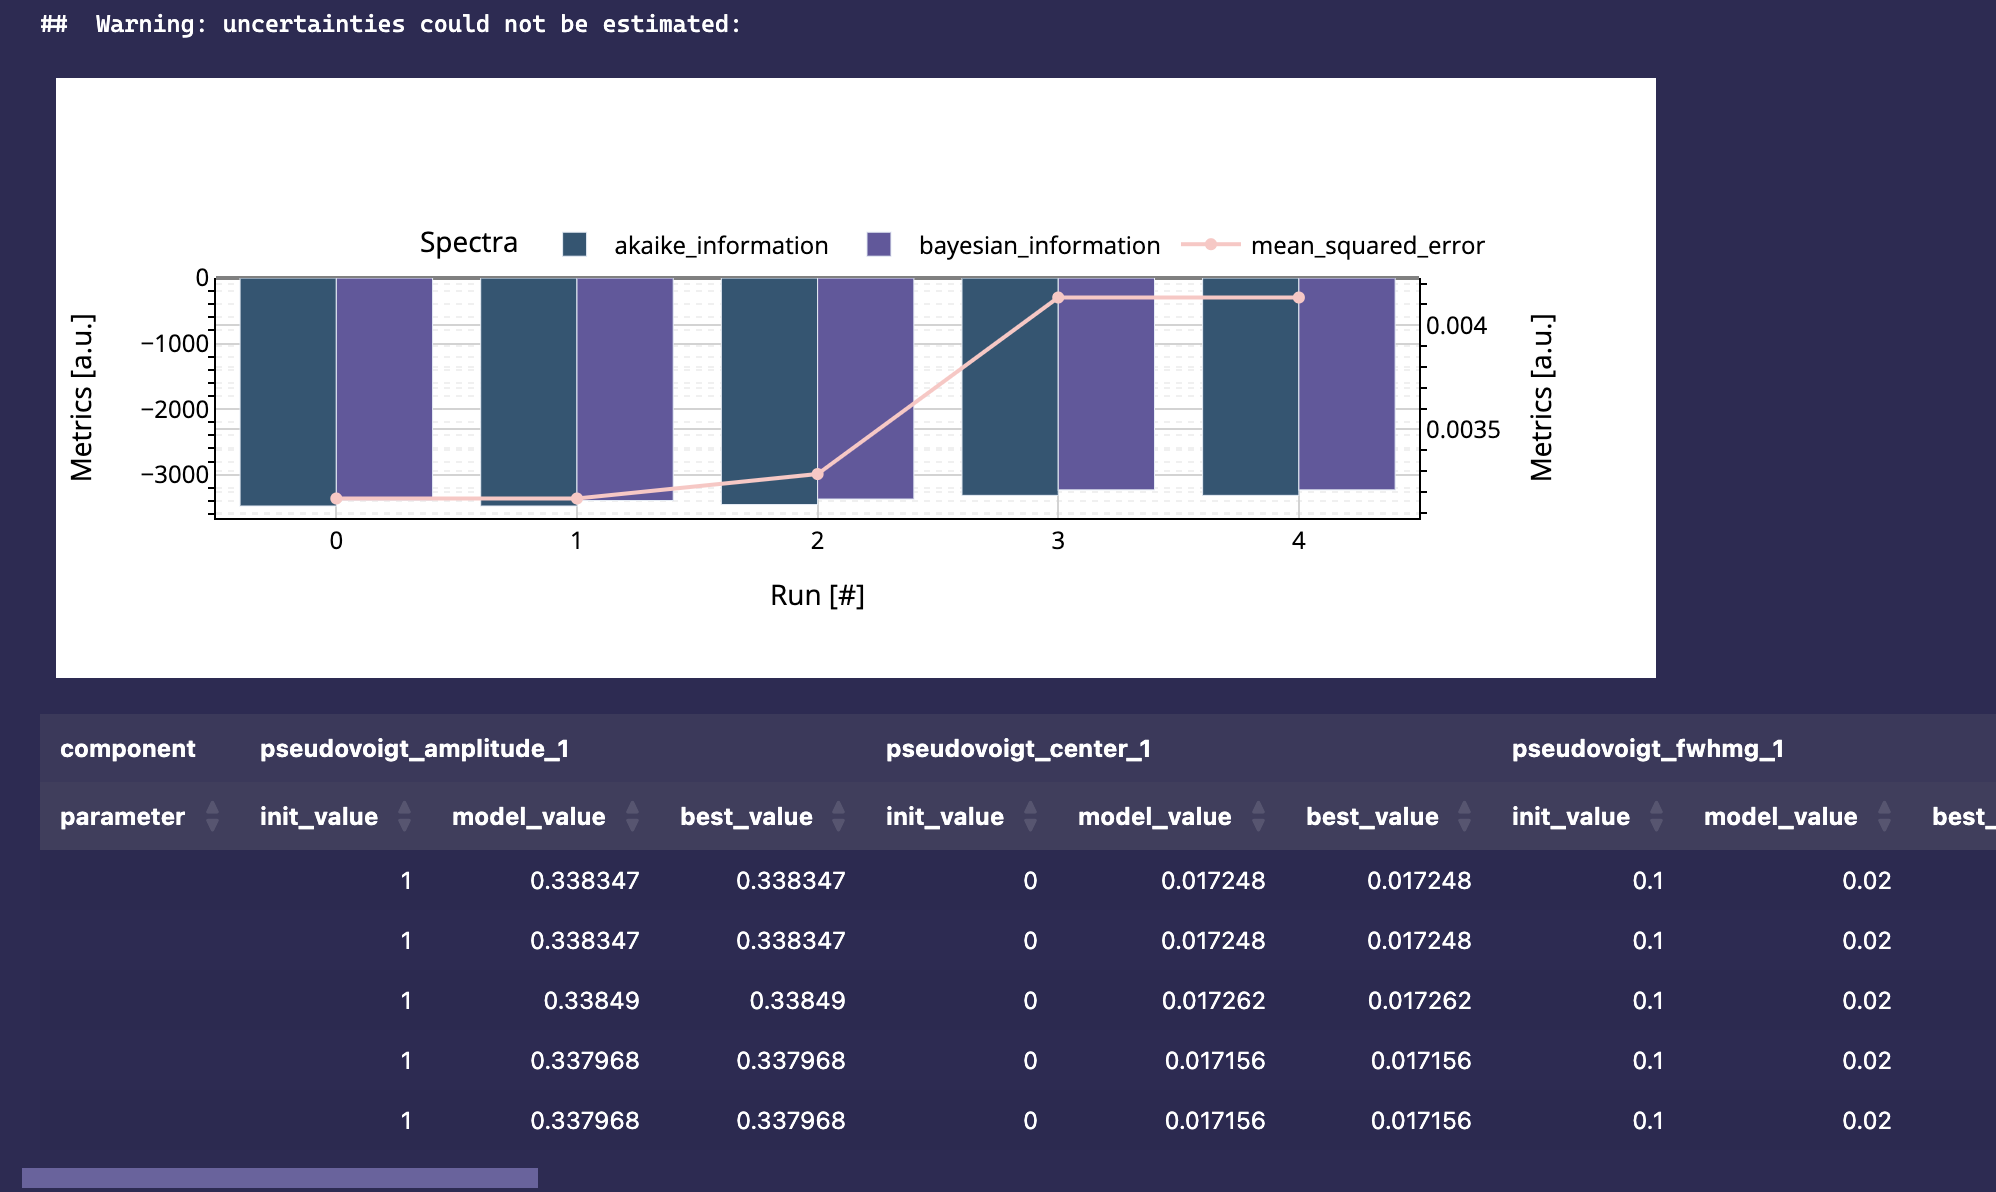